### Importación de datos



In [97]:
import pandas as pd
import matplotlib.pyplot as plt

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


In [98]:
# Agregar la columna 'Tienda' para identificar
tienda['Tienda'] = 'tienda1'
tienda2['Tienda'] = 'tienda2'
tienda3['Tienda'] = 'tienda3'
tienda4['Tienda'] = 'tienda4'

In [99]:
# Unir todos los datos
df = pd.concat([tienda, tienda2, tienda3, tienda4], ignore_index=True)
df.columns = df.columns.str.strip()

##1. Análisis de facturación



In [100]:
# Función para calcular la facturación total
def calcular_facturacion(lista_precios):
    total = 0
    for precio in lista_precios:
        total += precio
    return total

# Extraer las listas de precios de cada tienda
precios_t1 = tienda["Precio"].tolist()
precios_t2 = tienda2["Precio"].tolist()
precios_t3 = tienda3["Precio"].tolist()
precios_t4 = tienda4["Precio"].tolist()

# Calcular facturación total
facturacion_total = {
    "tienda 1": calcular_facturacion(precios_t1),
    "tienda 2": calcular_facturacion(precios_t2),
    "tienda 3": calcular_facturacion(precios_t3),
    "tienda 4": calcular_facturacion(precios_t4),
}

## 2. Ventas por categoría

In [101]:
# Función que cuenta ventas por categoría de una tienda
def contar_categorias(lista_categorias):
    conteo = {}
    for categoria in lista_categorias:
        if categoria in conteo:
            conteo[categoria] += 1
        else:
            conteo[categoria] = 1
    return conteo

# Aplicar la función a cada tienda
categorias_t1 = contar_categorias(tienda["Categoría del Producto"].tolist())
categorias_t2 = contar_categorias(tienda2["Categoría del Producto"].tolist())
categorias_t3 = contar_categorias(tienda3["Categoría del Producto"].tolist())
categorias_t4 = contar_categorias(tienda4["Categoría del Producto"].tolist())

In [102]:
# Unir todos los conteos en uno solo para comparación general
total_categorias = {}

for cat_dict in [categorias_t1, categorias_t2, categorias_t3, categorias_t4]:
    for categoria, cantidad in cat_dict.items():
        if categoria in total_categorias:
            total_categorias[categoria] += cantidad
        else:
            total_categorias[categoria] = cantidad

In [103]:
# Función para graficar categorías por tienda
def graficar_categoria_por_tienda(diccionario, titulo, color):
    plt.bar(diccionario.keys(), diccionario.values(), color=color)
    plt.title(titulo)
    plt.ylabel("Cantidad de ventas")
    plt.ylim(100,525)
    plt.xlabel("Categoría")
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()


## 3. Calificación promedio de la tienda


In [104]:
# Función para calcular el promedio de calificación para cada tienda
def calificacion_promedio(datos):
    resultado = {}
    for tienda in datos['Tienda'].unique():
        calificaciones = datos[datos['Tienda'] == tienda]['Calificación']
        promedio = calificaciones.mean()
        resultado[tienda] = promedio
    return resultado

## 4. Productos más y menos vendidos

In [105]:
# Función para calcular el producto más o menos vendido
def productos_mas_menos(datos):
    conteo = {}
    for producto in datos['Producto']:
        if producto in conteo:
            conteo[producto] += 1
        else:
            conteo[producto] = 1
    ordenados = sorted(conteo.items(), key=lambda x: x[1])
    return ordenados[:5], ordenados[-5:]

## 5. Envío promedio por tienda

In [106]:
# Función para calcula el coste de envio promedio por tienda
def envio_promedio(datos):
    resultado = {}
    for tienda in datos['Tienda'].unique():
        costos = datos[datos['Tienda'] == tienda]['Costo de envío']
        promedio = costos.mean()
        resultado[tienda] = promedio
    return resultado

## 6. Ganancia por tienda

In [107]:
#Funcion para calcular el total de la resta entre los ingresos (precios) y los costes (costo de envio)
def calcular_ganancia_neta(lista_precios, lista_envios):
    total = 0
    for i in range(len(lista_precios)):
        total += lista_precios[i] - lista_envios[i]
    return total

In [108]:
# Extraer listas de precios y envíos
envios_t1 = tienda["Costo de envío"].tolist()
envios_t2 = tienda2["Costo de envío"].tolist()
envios_t3 = tienda3["Costo de envío"].tolist()
envios_t4 = tienda4["Costo de envío"].tolist()

# Calcular ganancia neta total por tienda
ganancia_total = {
    "tienda 1": calcular_ganancia_neta(precios_t1, envios_t1),
    "tienda 2": calcular_ganancia_neta(precios_t2, envios_t2),
    "tienda 3": calcular_ganancia_neta(precios_t3, envios_t3),
    "tienda 4": calcular_ganancia_neta(precios_t4, envios_t4),
}


# Hallar que tienda tiene la menor ganancia
menor_ganancia = min(ganancia_total, key=ganancia_total.get)

# INFORME FINAL

Después de realizar un análisis completo sobre las operaciones de las cuatro tiendas de Alura Store, se evaluaron los siguientes aspectos: Facturación total, categorías de productos más vendidas, calificaciones de clientes, productos más y menos vendidos y costos promedio de envío.

##1. FACTURACIÓN TOTAL:

1. ANÁLISIS DE FACTURACIÓN:
- tienda 1: $1,150,880,400.00
- tienda 2: $1,116,343,500.00
- tienda 3: $1,098,019,600.00
- tienda 4: $1,038,375,700.00




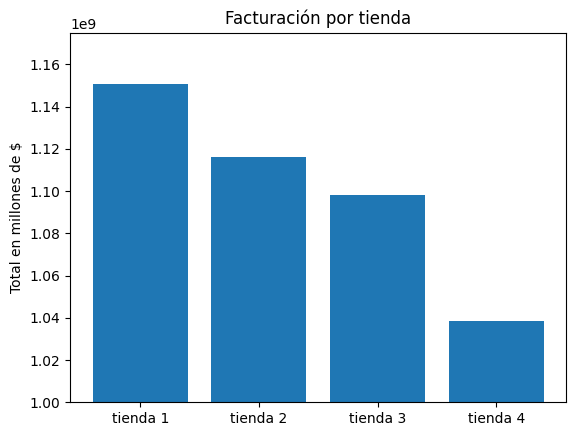


➡️ La tienda con menor facturación es: TIENDA 4


In [109]:
# Mostrar resultados
print("1. ANÁLISIS DE FACTURACIÓN:")
for tienda, total in facturacion_total.items():
    print(f"- {tienda}: ${total:,.2f}")

# === Agregar gráfico de barras ===
nombres = list(facturacion_total.keys())
valores = list(facturacion_total.values())

print("\n")
plt.bar(nombres,valores)
plt.title("Facturación por tienda")
plt.ylabel("Total en millones de $")
plt.ylim(1000000000, 1175000000)
plt.show()

# Determinar cuál es la tienda que menos factura
menor_facturacion = min(facturacion_total, key=facturacion_total.get)
print(f"\n➡️ La tienda con menor facturación es: {menor_facturacion.upper()}")

##2. VENTAS POR CATEGORÍA:
Se observó una tendencia en las cuatro tiendas por la venta de muebles y productos electrónicos.

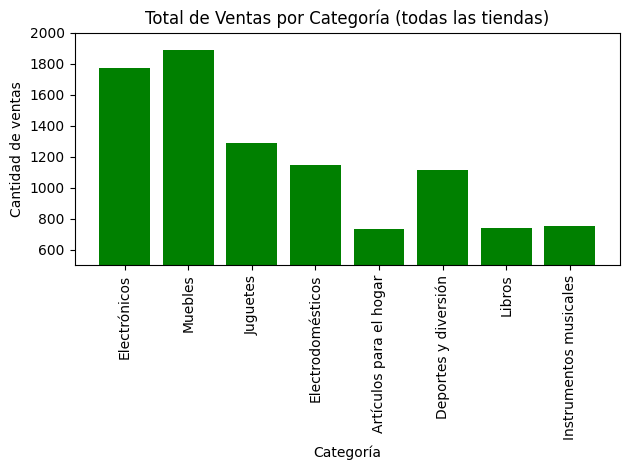


➡️ La categoría más vendida es: Muebles con 1886 unidades

➡️ La categoría menos vendida es: Artículos para el hogar con 730 unidades


In [110]:
# Graficar las ventas por categoria del total de tiendas
plt.bar(total_categorias.keys(), total_categorias.values(), color='green')
plt.title("Total de Ventas por Categoría (todas las tiendas)")
plt.ylabel("Cantidad de ventas")
plt.ylim(500,2000)
plt.xlabel("Categoría")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

print(f"\n➡️ La categoría más vendida es: {max(total_categorias, key=total_categorias.get)} con {max(total_categorias.values())} unidades")
print(f"\n➡️ La categoría menos vendida es: {min(total_categorias, key=total_categorias.get)} con {min(total_categorias.values())} unidades")

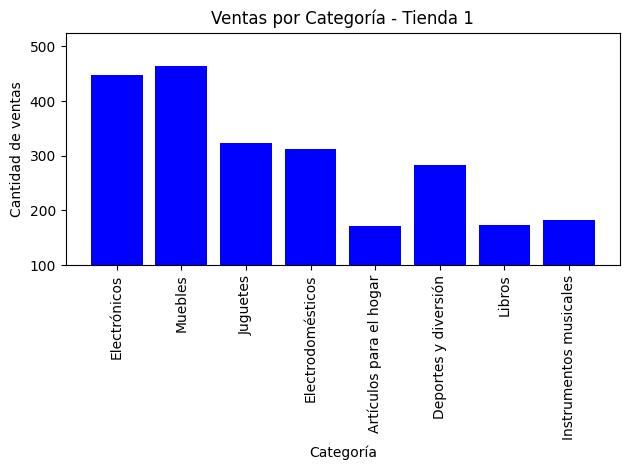

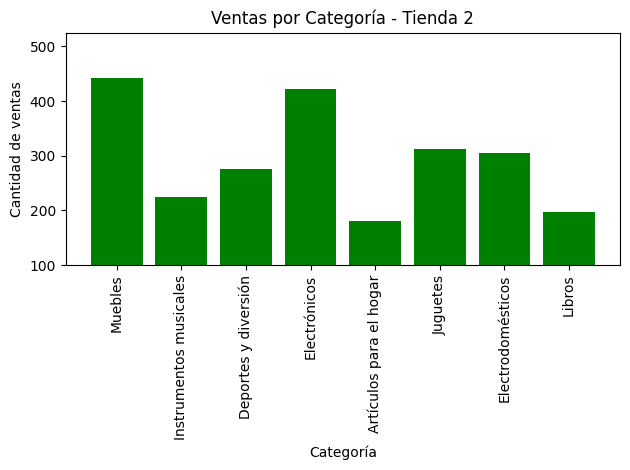

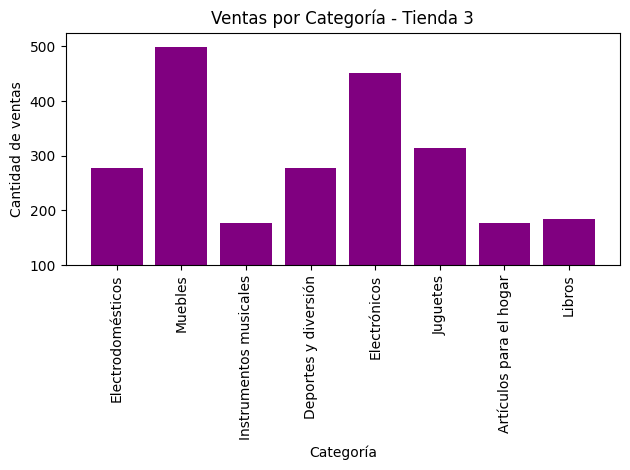

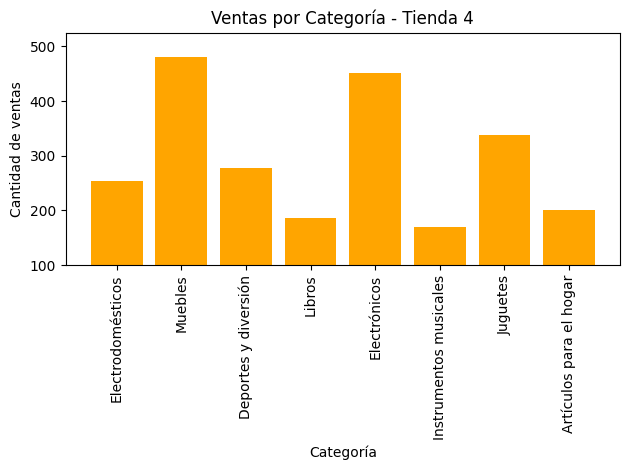

In [111]:
# Graficar una por una
graficar_categoria_por_tienda(categorias_t1, "Ventas por Categoría - Tienda 1", "blue")
print("\n")
graficar_categoria_por_tienda(categorias_t2, "Ventas por Categoría - Tienda 2", "green")
print("\n")
graficar_categoria_por_tienda(categorias_t3, "Ventas por Categoría - Tienda 3", "purple")
print("\n")
graficar_categoria_por_tienda(categorias_t4, "Ventas por Categoría - Tienda 4", "orange")

##3. CALIFICACIÓN PROMEDIO:

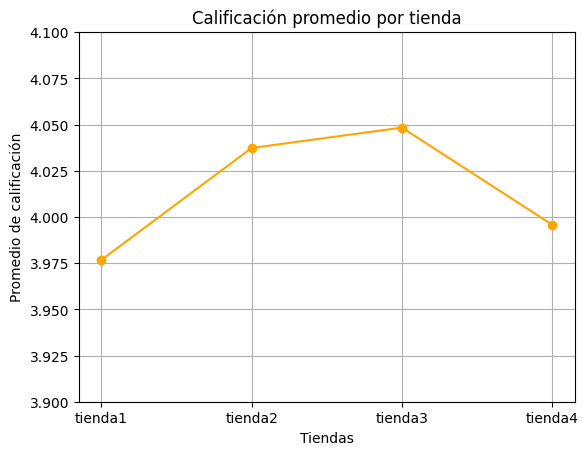


➡️ La tienda con mayor puntuación es: TIENDA3

➡️ La tienda con menor puntuación es: TIENDA1


In [112]:
# Gráfico de líneas para calificaciones promedio
calificaciones = calificacion_promedio(df)
tiendas = list(calificaciones.keys())
promedios = list(calificaciones.values())

plt.plot(tiendas, promedios, marker='o', linestyle='-', color='orange')
plt.title("Calificación promedio por tienda")
plt.xlabel("Tiendas")
plt.ylabel("Promedio de calificación")
plt.ylim(3.9, 4.1)  # Rango de calificación
plt.grid(True)
plt.show()

# Determinar cuál es la tienda que menos factura
mayor_promedio = max(calificaciones, key=calificaciones.get)
segundo_mejor_promedio = sorted(calificaciones, key=calificaciones.get)[-2]
tercer_mejor_promedio = sorted(calificaciones, key=calificaciones.get)[-3]
menor_promedio = min(calificaciones, key=calificaciones.get)

print(f"\n➡️ La tienda con mayor puntuación es: {mayor_promedio.upper()}")
print(f"\n➡️ La tienda con menor puntuación es: {menor_promedio.upper()}")

##4. PRODUCTOS MÁS Y MENOS VENDIDOS:

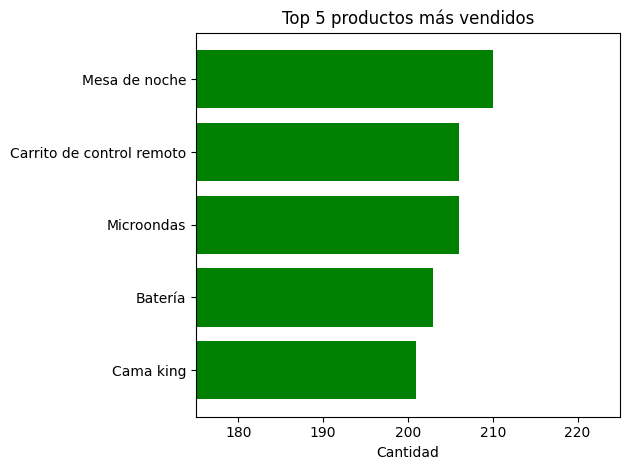

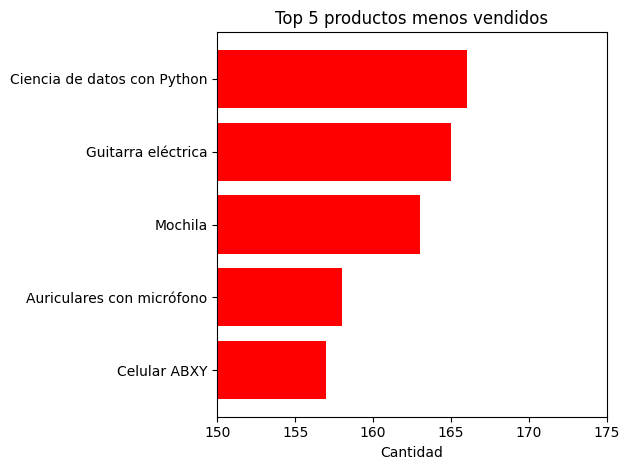


➡️ El producto más vendido es: Mesa de noche con 210 unidades

➡️ El producto menos vendido es: Celular ABXY con 157 unidades


In [113]:
menos_vendidos, mas_vendidos = productos_mas_menos(df)
nombres, cantidades = zip(*mas_vendidos)
plt.barh(nombres, cantidades, color='green')
plt.title("Top 5 productos más vendidos")
plt.xlabel("Cantidad")
plt.xlim(175, 225)
plt.tight_layout()
plt.show()

print("\n")
nombres, cantidades = zip(*menos_vendidos)
plt.barh(nombres, cantidades, color='red')
plt.title("Top 5 productos menos vendidos")
plt.xlabel("Cantidad")
plt.xlim(150, 175)
plt.tight_layout()
plt.show()

mayor_venta = max(mas_vendidos, key=lambda x: x[1])
mayor_cantidad = mayor_venta[1]
menor_venta = min(menos_vendidos, key=lambda x: x[1])
menor_cantidad = menor_venta[1]

print(f"\n➡️ El producto más vendido es: {mayor_venta[0]} con {mayor_cantidad} unidades")
print(f"\n➡️ El producto menos vendido es: {menor_venta[0]} con {menor_cantidad} unidades")

##5. ENVÍO PROMEDIO:

5. ENVÍO PROMEDIO:
- tienda1: $26,018.61
- tienda2: $25,216.24
- tienda3: $24,805.68
- tienda4: $23,459.46


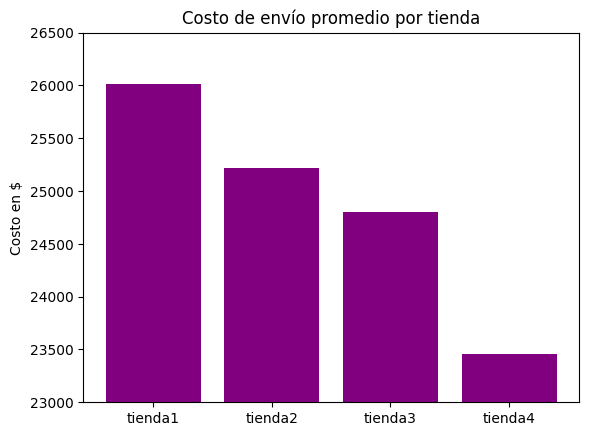


➡️ La tienda con mayor costo de envío promedio es: La TIENDA1

➡️ La tienda con menor costo de envío promedio es: La TIENDA4


In [114]:
envios = envio_promedio(df)

print("5. ENVÍO PROMEDIO:")
for tienda, costo in envios.items():
    print(f"- {tienda}: ${costo:,.2f}")

plt.bar(envios.keys(), envios.values(), color='purple')
plt.title("Costo de envío promedio por tienda")
plt.ylabel("Costo en $")
plt.ylim(23000, 26500)
plt.show()

maximo = max(envios, key=envios.get)
minimo = min(envios, key=envios.get)

print(f"\n➡️ La tienda con mayor costo de envío promedio es: La {maximo.upper()}")
print(f"\n➡️ La tienda con menor costo de envío promedio es: La {minimo.upper()}")

## 6.Recomendación final

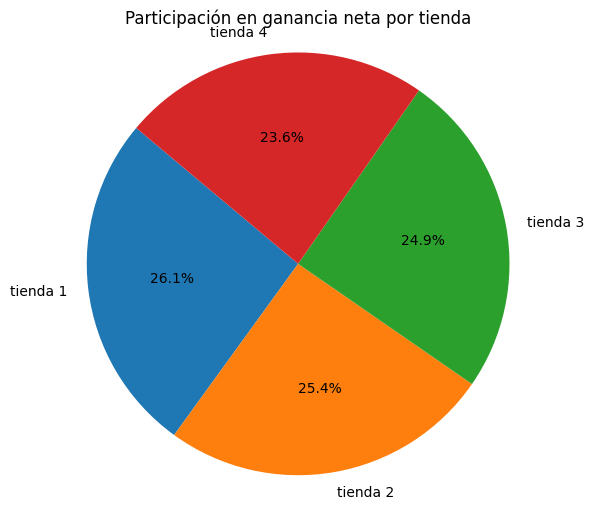


Recomendación final basada en ganancia neta:
Luego de analizar la facturación, los costos de envío, las valoraciones y las categorías más vendidas se concluye que:
➡️La tienda que genera la menor ganancia es la **tienda 4**.
➡️La **tienda4** no destaca en la calificación de los usuarios ocupando el 3° lugar .

 Por lo tanto:
➡️Se recomienda vender la **tienda 4**.


In [115]:
# Gráfico de pastel
plt.figure(figsize=(6, 6))
plt.pie(ganancia_total.values(), labels=ganancia_total.keys(), autopct='%1.1f%%', startangle=140)
plt.title("Participación en ganancia neta por tienda")
plt.axis('equal')
plt.show()


print("\nRecomendación final basada en ganancia neta:")
print("Luego de analizar la facturación, los costos de envío, las valoraciones y las categorías más vendidas se concluye que:")
print(f"➡️La tienda que genera la menor ganancia es la **{menor_ganancia}**.")
print(f"➡️La **{tercer_mejor_promedio}** no destaca en la calificación de los usuarios ocupando el 3° lugar .")
print("\n Por lo tanto:")
print(f"➡️Se recomienda vender la **{menor_ganancia}**.")